# PJM Hourly Energy Consumption Data Analysis
---

You can find this dataset in [Kaggle](https://www.kaggle.com/robikscube/hourly-energy-consumption)

The dataset has data from the following States Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The data file I am loading is from Dayton Power and Light company that covers Dayton Ohio and surroundings.

**The variables are :**
- Date
- Hourly Energy Consumption



In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from empiricaldist import Pmf
from empiricaldist import Cdf
import seaborn as sns
from scipy.stats import linregress
import statsmodels.formula.api as smf

In [3]:
df=pd.read_csv("DAYTON_hourly.csv")
print(df.head())
print(df.shape)
print(df.dtypes)

              Datetime  DAYTON_MW
0  2004-12-31 01:00:00     1596.0
1  2004-12-31 02:00:00     1517.0
2  2004-12-31 03:00:00     1486.0
3  2004-12-31 04:00:00     1469.0
4  2004-12-31 05:00:00     1472.0
(121275, 2)
Datetime      object
DAYTON_MW    float64
dtype: object


In [4]:
#convert Date to Datetime object
df["date"]=pd.to_datetime(df['Datetime'],format='%Y-%m-%d %H:%M:%S')
print(df.head())
print(df.dtypes)

              Datetime  DAYTON_MW                date
0  2004-12-31 01:00:00     1596.0 2004-12-31 01:00:00
1  2004-12-31 02:00:00     1517.0 2004-12-31 02:00:00
2  2004-12-31 03:00:00     1486.0 2004-12-31 03:00:00
3  2004-12-31 04:00:00     1469.0 2004-12-31 04:00:00
4  2004-12-31 05:00:00     1472.0 2004-12-31 05:00:00
Datetime             object
DAYTON_MW           float64
date         datetime64[ns]
dtype: object


In [5]:
#Find missing values
df.isna().any() 

Datetime     False
DAYTON_MW    False
date         False
dtype: bool

### After doing some clean up of the data. We check the describe function. The data set has 121275 rows, the mean is 2037 Mega Watts and we can see that the distribution is very normal shaped like a bell

In [6]:
df.describe()

,DAYTON_MW
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


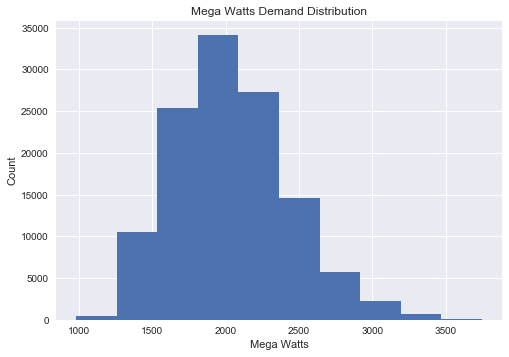

In [7]:
plt.style.use('seaborn')
plt.xlabel("Mega Watts")
plt.ylabel("Count")
plt.title("Mega Watts Demand Distribution")
df['DAYTON_MW'].hist()

---


### Lets group the data by month and year
---

In [8]:
## Subset by date
df[df['date']>"2011-01-01 05:00:00"].head()

,Datetime,DAYTON_MW,date
54778,2011-12-31 01:00:00,1560.0,2011-12-31 01:00:00
54779,2011-12-31 02:00:00,1505.0,2011-12-31 02:00:00
54780,2011-12-31 03:00:00,1460.0,2011-12-31 03:00:00
54781,2011-12-31 04:00:00,1462.0,2011-12-31 04:00:00
54782,2011-12-31 05:00:00,1456.0,2011-12-31 05:00:00


#### On this graph we can see that from 2009 to 2018 the average  Mega Watt demand changed

                                Datetime  DAYTON_MW
date                                               
2004-12-31 01:00:00  2004-12-31 01:00:00     1596.0
2004-12-31 02:00:00  2004-12-31 02:00:00     1517.0
2004-12-31 03:00:00  2004-12-31 03:00:00     1486.0
2004-12-31 04:00:00  2004-12-31 04:00:00     1469.0
2004-12-31 05:00:00  2004-12-31 05:00:00     1472.0


Text(0.5, 1.0, 'Yearly Mega Watts Mean Demand')

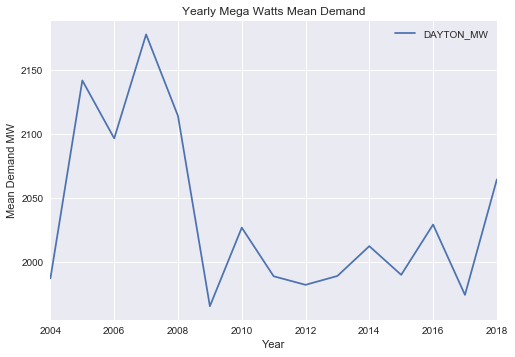

In [9]:
## Making date an index
df_index=df.set_index('date')
print(df_index.head())



## now we are going to group by year and take the yearly mean
df_yearly=df_index.groupby(df_index.index.year).mean()
df_yearly.plot()
## plot labels
plt.xlabel("Year")
plt.ylabel(" Mean Demand MW ")
plt.title("Yearly Mega Watts Mean Demand")

***

#### On this graph, the data is group by month from 2004 to 2018. On the plot we see the monthly mean demand.
#### something interesting is that the demand drops around April and Octuber.

Text(0.5, 1.0, 'Monthly  Mega Watts Mean Demand From 2004 to 2018')

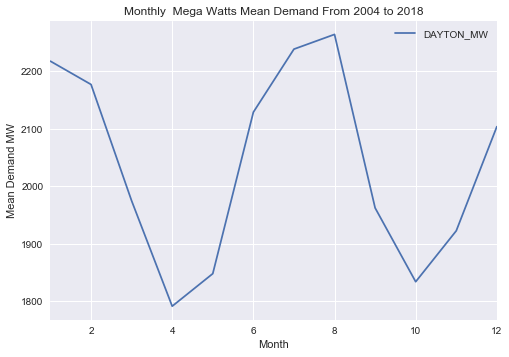

In [10]:
## now we are going to group by month and take the monthly mean
df_month=df_index.groupby(df_index.index.month).mean()
df_month.plot()

plt.xlabel("Month")
plt.ylabel(" Mean Demand MW ")
plt.title("Monthly  Mega Watts Mean Demand From 2004 to 2018")

***

#### The daily demand seems to be  pretty constant and between 2060 and 2000 thats a short range

        DAYTON_MW
date             
1     1997.791615
2     2028.662840
3     2029.798393
4     2021.589151
5     2033.318695


Text(0.5, 1.0, 'Daily Mega Watts Mean Demand From 2004 to 2018')

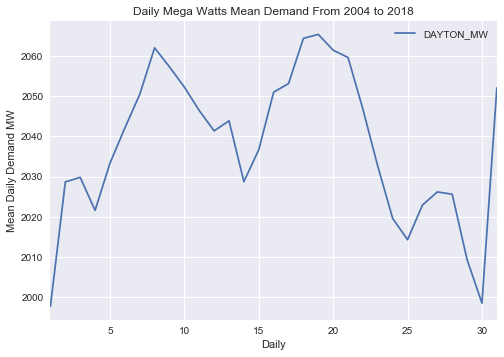

In [13]:
## now we are going to group by month and take the monthly mean
df_day=df_index.groupby(df_index.index.day).mean()
df_day.plot()

plt.xlabel("Daily")
plt.ylabel(" Mean Daily Demand MW ")
plt.title("Daily Mega Watts Mean Demand From 2004 to 2018")

#### Doing the Mean by hour  is clearly tha the power demand at night drops a considerable amount.

Text(0.5, 1.0, 'Hourly Mega Watts Mean Demand From 2004 to 2018')

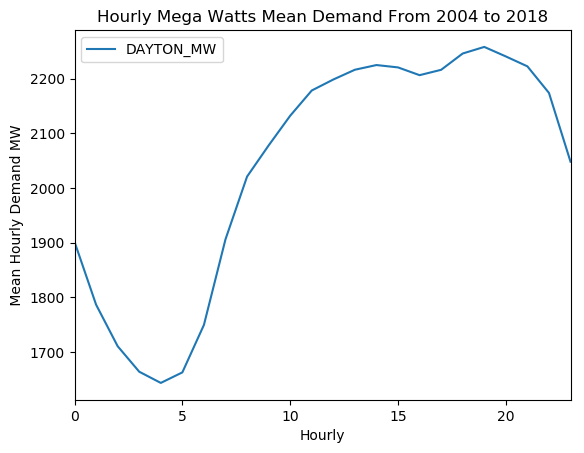

In [46]:
df_hour=df_index.groupby(df_index.index.hour).mean()
df_hour.plot()
plt.xlabel("Hourly")
plt.ylabel(" Mean Hourly Demand MW ")
plt.title("Hourly Mega Watts Mean Demand From 2004 to 2018")

#### The graph above was very interesting. 
#### Now lets do a scatter plot to get a better idea instead of just ploting the mean of the group

In [36]:
#Create a new column named "hours" with only the hours
df["hours"]=df['date'].dt.strftime("%H")
df.head()
#change the hours to an integer so that we can do some plots
#use .to_numeric method
hours_num=pd.to_numeric(df['hours'])
df['hours']=hours_num
df.head()

,Datetime,DAYTON_MW,date,hours
0,2004-12-31 01:00:00,1596.0,2004-12-31 01:00:00,1
1,2004-12-31 02:00:00,1517.0,2004-12-31 02:00:00,2
2,2004-12-31 03:00:00,1486.0,2004-12-31 03:00:00,3
3,2004-12-31 04:00:00,1469.0,2004-12-31 04:00:00,4
4,2004-12-31 05:00:00,1472.0,2004-12-31 05:00:00,5


#### As we see on the graph from 0 to 5 hrs the demand is reducce. From the graph above we saw that the  range from 0 am to 5 am was from 1900 MW to around 1400 MW. With this plot we can see better where the data is and on big demand hours from 17 to 20 hours there are some values above 2500 MW

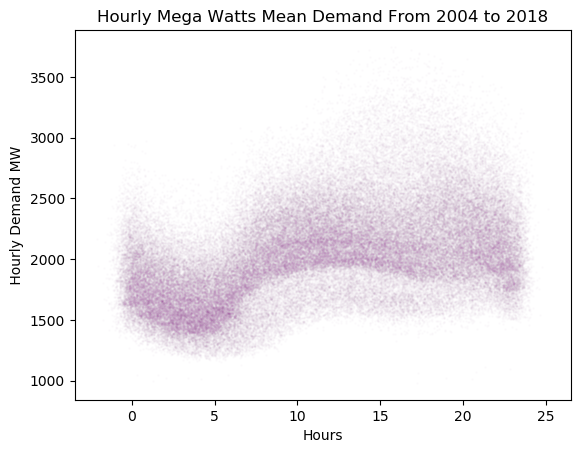

In [47]:
plt.style.use('default')

#insert some jitter on the data
j_hours=df['hours']+np.random.normal(0,0.5,size=len(df['hours']))
j_demand=df['DAYTON_MW']+np.random.normal(0,0.5,size=len(df['DAYTON_MW']))
plt.xlabel("Hours")
plt.ylabel(" Hourly Demand MW ")
plt.title("Hourly Mega Watts Mean Demand From 2004 to 2018")
plt.plot(j_hours,j_demand,'o',markersize=1,alpha=.01,color='purple')
plt.show()